In [7]:
from graphviz import Graph

G = Graph()
for i in range(6):
    G.node('{}'.format(i))
G.edges(['12', '23', '34', '65', '16', '13', '03'])

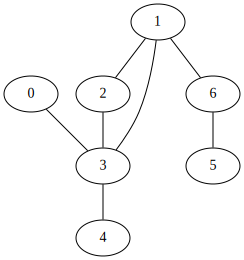

In [9]:
G